In [1]:
#https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51#:~:text=Boxplots%20are%20a%20standardized%20way,middle%20value%20of%20the%20dataset.&text=interquartile%20range%20(IQR)%3A%2025th%20to%20the%2075th%20percentile.
# Import all libraries for the rest of the blog post
from scipy.integrate import quad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mGalarnyk/Python_Tutorials/master/Kaggle/BreastCancerWisconsin/data/data.csv')

In [3]:
df.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


In [4]:
# Looking at the Distribution of the Dataset in terms of Diagnosis
df['diagnosis'].value_counts(dropna = False)

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
length = len(df)

# Number of malignant cases
malignant = len(df[df['diagnosis']=='M'])

#Rate of malignant tumors over all cases
rate = (float(malignant)/(length))*100

print('The malignant percentage is: {}%'.format(rate))
print('The benign percentage is: {}%'.format(100 - rate))

The malignant percentage is: 37.258347978910365%
The benign percentage is: 62.741652021089635%


In [6]:
features = set(df.columns)
features.remove('diagnosis')

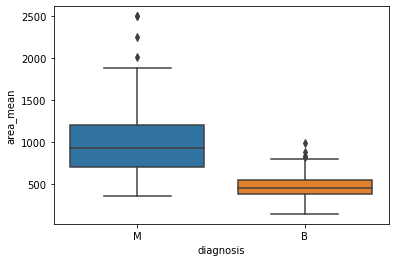

In [7]:
#seaborn
sns.boxplot(x='diagnosis', y='area_mean', data=df)
plt.savefig('seaborn_basic_area_mean_diagnosis.png')

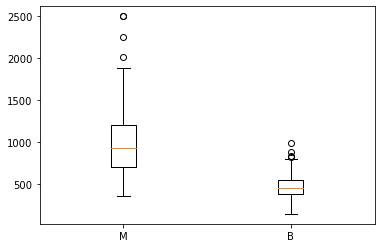

In [8]:
#matplotlib
malignant = df[df['diagnosis']=='M']['area_mean']
benign = df[df['diagnosis']=='B']['area_mean']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([malignant,benign], labels=['M', 'B'])

plt.savefig('matplotlib_basic_area_mean_diagnosis.png');

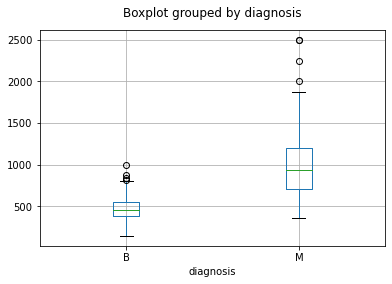

In [9]:
#pandas
df.boxplot(column = 'area_mean', by = 'diagnosis');
plt.title('')
plt.savefig('pandas_basic_area_mean_diagnosis.png')

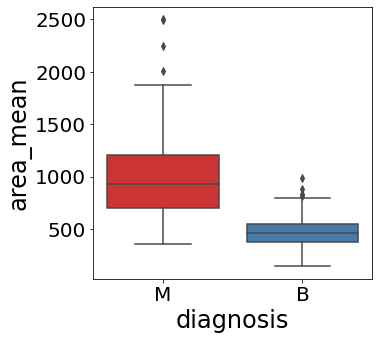

In [11]:
#Nicer Seaborn
plt.figure(figsize=(5,5))

sns.boxplot(x='diagnosis', y='area_mean', data=df, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('diagnosis', fontsize = 24)
plt.ylabel('area_mean', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.savefig('area_mean_diagnosis.png')

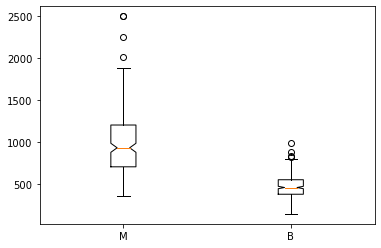

In [12]:
#Notched Boxplot
malignant = df[df['diagnosis']=='M']['area_mean']
benign = df[df['diagnosis']=='B']['area_mean']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([malignant,benign], notch = True, labels=['M', 'B']);

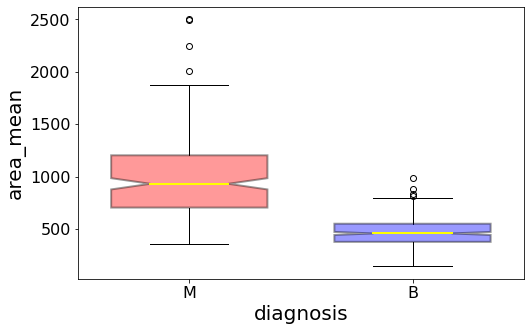

In [13]:
# Nicer Notched Boxplot

malignant = df[df['diagnosis']=='M']['area_mean']
benign = df[df['diagnosis']=='B']['area_mean']

fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
boxplots = ax.boxplot([malignant,benign],
           notch = True,
           labels=['M', 'B'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')

plt.xlabel('diagnosis', fontsize = 20);
plt.ylabel('area_mean', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

plt.savefig('nicer_notchedBoxplot_basic_area_mean_diagnosis.png')

In [14]:
# Import all libraries for this portion of the blog post
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


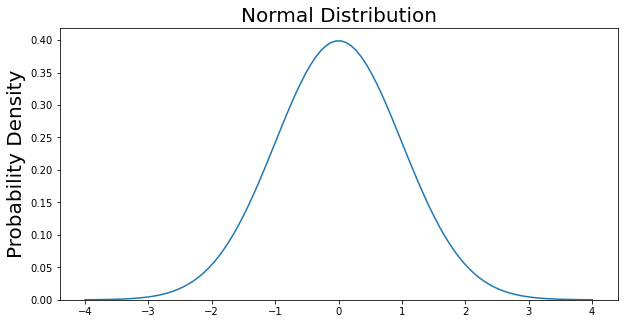

In [15]:
x = np.linspace(-4, 4, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20);

In [16]:
# Make PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )
# Integrate PDF from -.6745 to .6745
result_50p, _ = quad(normalProbabilityDensity, -.6745, .6745, limit = 1000)
print(result_50p)

0.5000065142726018


In [17]:
# Make a PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )
# Integrate PDF from -2.698 to 2.698
result_99_3p, _ = quad(normalProbabilityDensity,
                     -2.698,
                     2.698,
                     limit = 1000)
print(result_99_3p)

0.9930242559336101
